## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Regression with Scikit Learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

## Regression

In [4]:
df = pd.read_csv(url + 'weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


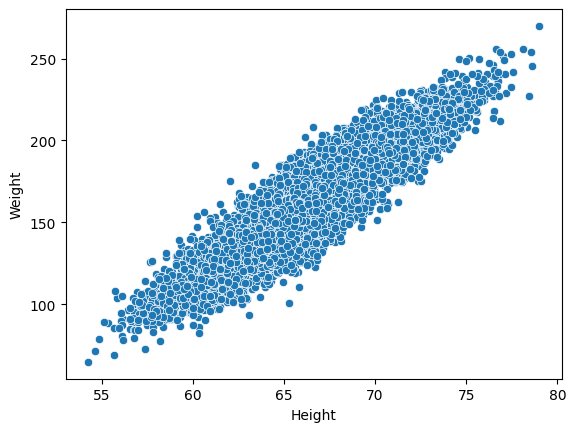

In [6]:
sns.scatterplot(data=df,
                x='Height',
                y='Weight');

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[['Height']].values
y = df['Weight'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_train, y_train)

0.8544074009765417

In [13]:
model.score(X_test, y_test)

0.8581952493935258

In [14]:
y_pred_test = model.predict(X_test)

## Plot the line of best fit

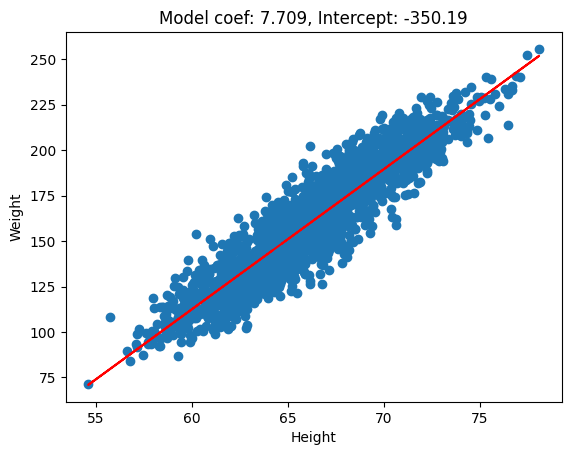

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.title("Model coef: {:0.3f}, Intercept: {:0.2f}".format(model.coef_[0], model.intercept_))
plt.xlabel("Height")
plt.ylabel("Weight");

### Compare true and predicted values ($y$ vs $\hat{y}$)

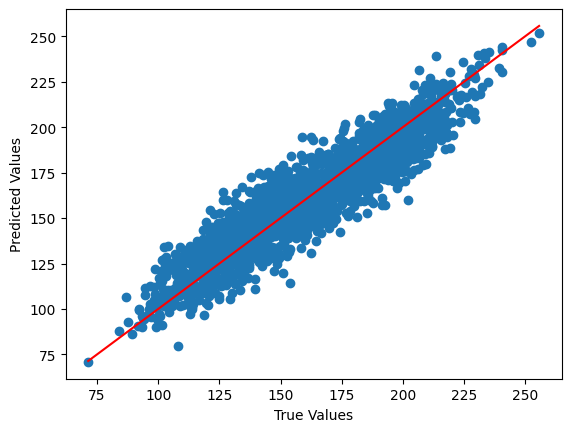

In [16]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red');

### Exercise 1: multiple features

More features: `sqft`, `bdrms`, `age`, `price`

- load the dataset `housing-data.csv`
- visualize the data using `sns.pairplot`
- add more columns in the feature definition `X = ...`
- train and evaluate a Linear regression model to predict `price`
- compare predictions with actual values
- is your score good?
- change the `random_state` in the train/test split function. Does the score stay stable?

In [17]:
df = pd.read_csv(url + 'housing-data.csv')

In [18]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


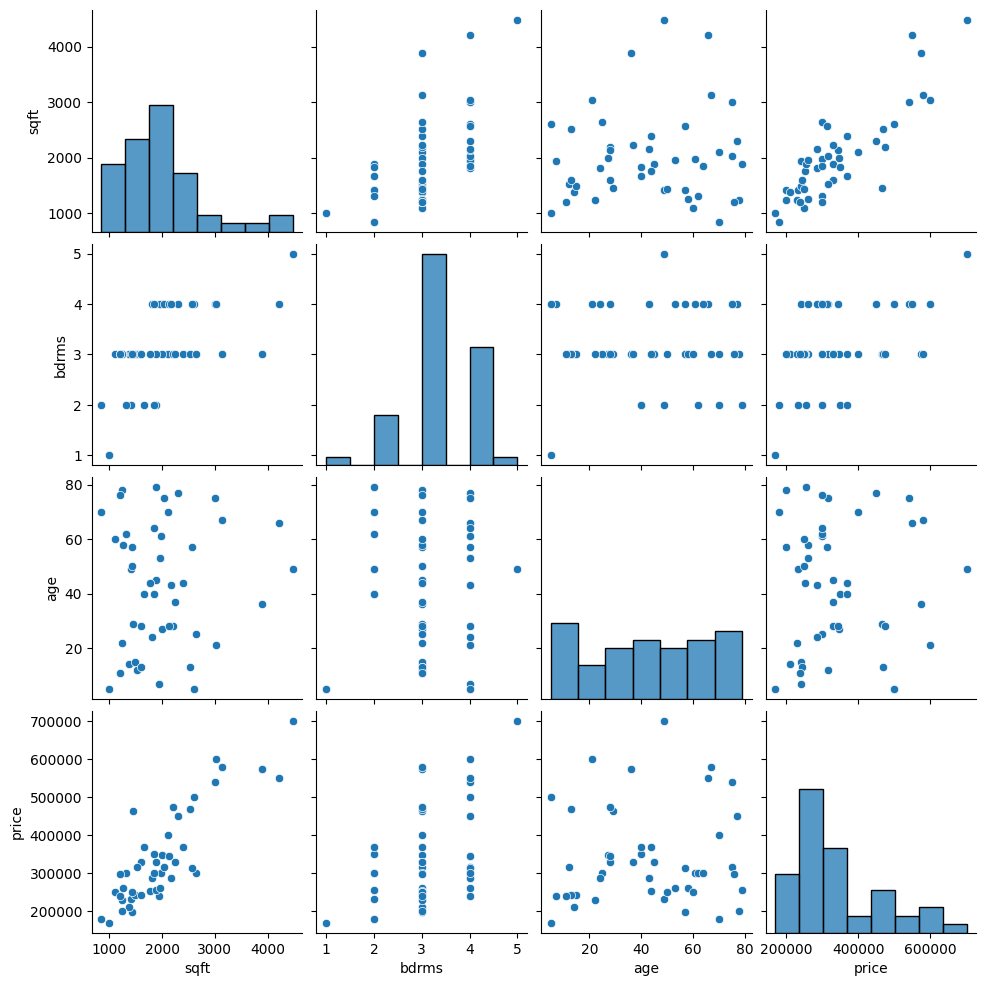

In [20]:
sns.pairplot(df);

In [29]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=155)

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.score(X_train, y_train)

0.6380478468099586

In [62]:
model.score(X_test, y_test)

0.8598776373080561

In [63]:
y_pred_test = model.predict(X_test)

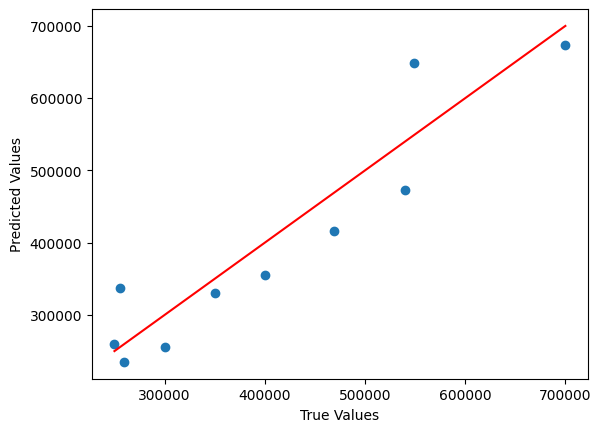

In [64]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red')

### Exercise 2

- Encapsulate the split/train/evaluate steps into a single function with signature:

```python
def train_eval(random_state=0):
  # YOUR CODE HERE

  return train_score, test_score
```
- Compare the performance of the model for several random states

- Bonus points if you plot a histogram of train and test scores

In [45]:
from sklearn.metrics import r2_score

In [46]:
def train_eval(random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_score = r2_score(y_train, y_pred_train)
    test_score = r2_score(y_test, y_pred_test)

    return train_score, test_score

In [47]:
random_state = range(500)
scores = [train_eval(rs) for rs in random_state]

In [48]:
dfscores = pd.DataFrame(scores, index=random_state, columns=['train_score', 'test_score'])

<Axes: title={'center': 'Model sampling'}, ylabel='Frequency'>

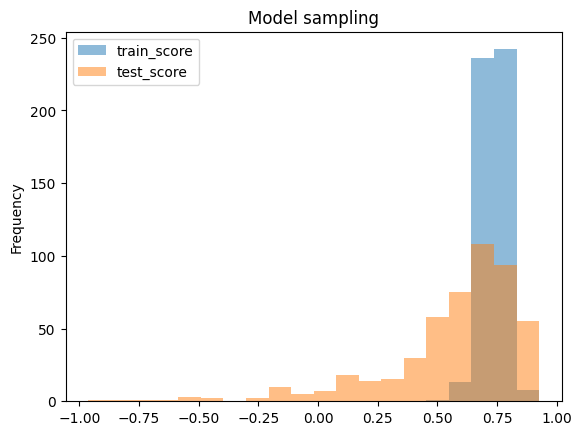

In [49]:
dfscores.plot.hist(alpha=0.5, bins=20, title='Model sampling')

In [67]:
dfscores.idxmax()

train_score    156
test_score     154
dtype: int64

### Exercise 3:

Let's see how easy it is to test different models on a larger dataset.

Here we load the California Housing dataset from Scikit Learn. Your goal is to define a function that:
- trains a model
- plots `y_pred` vs `y_true`

You can skip doing train/test split for this exercise.

Then compare the performance of the models given below:
- `sklearn.linear_model.LinearRegression`
- `sklearn.ensembleGradient.BoostingRegressor`
- `sklearn.ensembleRandom.ForestRegressor`
- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.Lasso`

Function signature:

```python
def train_eval_plot(model):
  # YOUR CODE HERE

```

In [78]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [79]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
target

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jlgut\AppData\Local\Temp\ipykernel_16236\291191957.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [80]:
dataset = fetch_california_housing()
y = dataset.target

Xdf = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = Xdf.values

Xdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [81]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [82]:
def train_eval_plot(model):
  model.fit(X, y)
  y_pred = model.predict(X)

  plt.figure()
  plt.scatter(y, y_pred)
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")

  m = y.min()
  M = y.max()

  plt.plot((m, M), (m, M), color='red')
  plt.title(model.__class__.__name__)


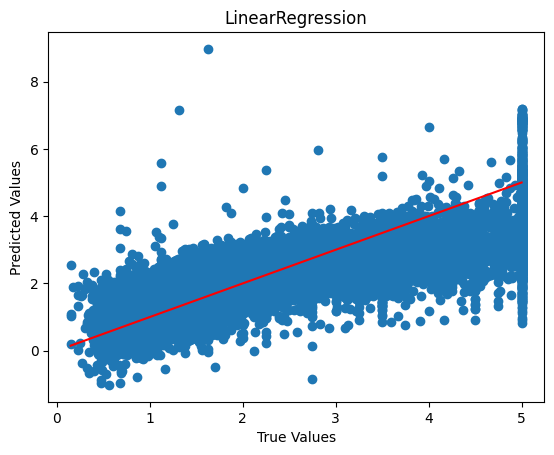

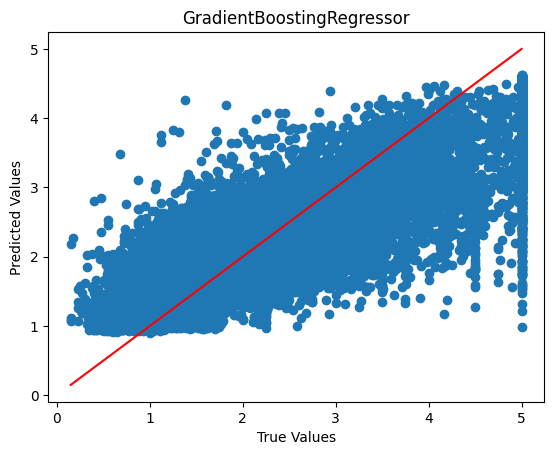

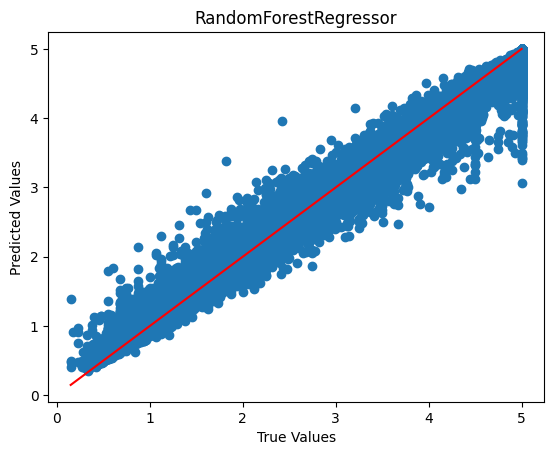

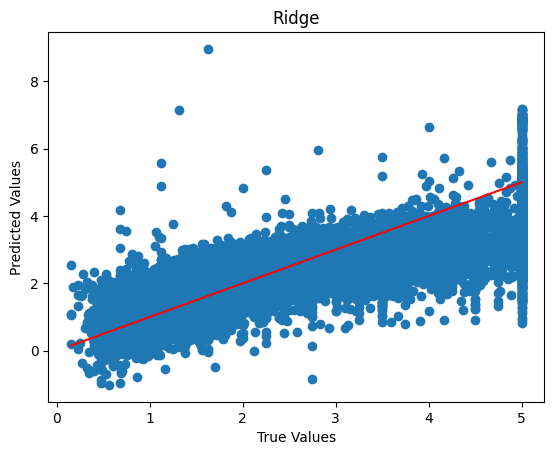

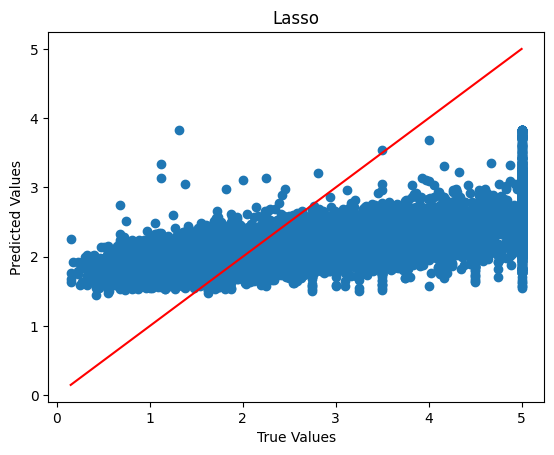

In [83]:
models = [LinearRegression(),
          GradientBoostingRegressor(random_state=0, n_estimators=25),
          RandomForestRegressor(random_state=0, n_estimators=25),
          Ridge(),
          Lasso()]

for model in models:
    train_eval_plot(model)